# Data Wrangling and Cleaning

In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# convert year, month and day to one datetime object
flights=pd.read_csv('flights.csv', low_memory=False, parse_dates=[[1, 2]], 
                    date_parser=lambda *columns: datetime(2015, *map(int, columns)), index_col=0)

In [79]:
# filter only CHI - BOS flights and BOS - CHI

ORIG = flights['ORIGIN_AIRPORT'].isin(['ORD','BOS'])
DEST = flights['DESTINATION_AIRPORT'].isin(['ORD','BOS'])
flights_clean = flights[ORIG & DEST]
flights_clean.is_copy = False
flights_clean['DATE']=flights_clean.index

In [80]:
# delete rows with any missing information in ARRIVAL_DELAY column - essentially filters out all cancellations 
flights_clean = flights_clean.dropna(subset=['ARRIVAL_DELAY']) 
flights_clean.head()


,YEAR,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,-33.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,UA,1198,N38451,BOS,ORD,600,557.0,-3.0,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,UA,521,N854UA,BOS,ORD,700,700.0,0.0,...,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,AA,1247,N3CHAA,BOS,ORD,700,659.0,-1.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,B6,111,N267JB,BOS,ORD,715,710.0,-5.0,...,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [81]:
# weather data
weather=pd.read_csv('weather.csv', low_memory=False, index_col=0)
# convert weather date to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['ORIGIN_AIRPORT'] = np.where(weather['NAME'] == 'BOSTON, MA US', 'BOS', 'ORD')
weather.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,EVAP,...,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,ORIGIN_AIRPORT
STATION,,,,,,,,,,,,,,,,,,,,,
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD


In [82]:
# merge the data together 
flights_w_weather = flights_clean.merge(weather, how = 'inner', on = ['DATE', 'ORIGIN_AIRPORT'])
flights_w_weather.head()

,YEAR,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
ohare_boston = flights_w_weather['NAME'].isin(['CHICAGO OHARE INTERNATIONAL AIRPORT, IL US', 'BOSTON, MA US'])
flights_w_weather = flights_w_weather[ohare_boston]
flights_w_weather = flights_w_weather.dropna(axis=1, how='all')
flights_w_weather.reset_index()

# deleted unnecessary columns - all that deleted had over half the data missing 
flights_w_weather = flights_w_weather.dropna(axis=1, how='any')

# utilize function to make unique ids to delete duplicates
def make_identifier(df):
    str_id = df.apply(lambda x: '_'.join(map(str, x)), axis=1)
    return pd.factorize(str_id)[0]

flights_w_weather['combined_id'] = make_identifier(flights_w_weather[['DATE','DEPARTURE_TIME', 'TAIL_NUMBER']])
# drop duplicates 
flights_w_weather = flights_w_weather.drop_duplicates(subset=['combined_id'], keep='first')
flights_w_weather = flights_w_weather.reset_index()

In [84]:
import scipy.stats as stats
import pylab

# check departure delay for extreme values
flights_w_weather.DEPARTURE_DELAY.sort_values()
# delete extreme values
flights_w_weather = flights_w_weather.drop(flights_w_weather[flights_w_weather['DEPARTURE_DELAY'] > 460].index)

In [85]:
# create new variable to identify whether a delay occured or not and if it was departure or arrival
flights_w_weather.is_copy = False
flights_w_weather['AD_TAG'] = flights_w_weather.ARRIVAL_DELAY.map( lambda x: 1 if x > 0 else 0)
flights_w_weather['DD_TAG'] = flights_w_weather.DEPARTURE_DELAY.map( lambda x: 1 if x > 0 else 0)
# create a variable for delay 
flights_w_weather['DELAY'] = np.where(flights_w_weather['DD_TAG']==1, 1, 
                                      (np.where(flights_w_weather['AD_TAG']==1, 1, 0)))
# count delay vs. non delay
print(flights_w_weather['DELAY'].value_counts())

1    6467
0    6273
Name: DELAY, dtype: int64


# EDA and Inferential Statistics

AA    5744
UA    4234
B6    1907
OO     503
NK     352
Name: AIRLINE, dtype: int64


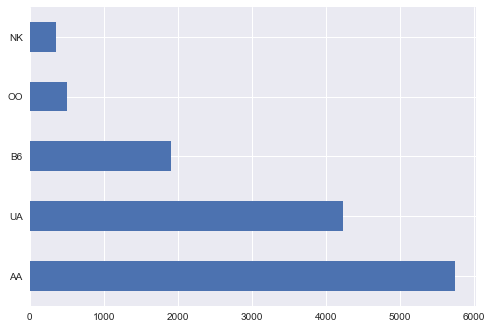

ORD    6374
BOS    6366
Name: ORIGIN_AIRPORT, dtype: int64
BOS    6374
ORD    6366
Name: DESTINATION_AIRPORT, dtype: int64


In [241]:
# Initial exploration
print(flights_w_weather['AIRLINE'].value_counts())
# Counts of each airline
flights_w_weather['AIRLINE'].value_counts().plot(kind='barh')
plt.show()
# count of boston vs. chicago departures
print(flights_w_weather['ORIGIN_AIRPORT'].value_counts())
# count of boston vs. chicago arrivals
print(flights_w_weather['DESTINATION_AIRPORT'].value_counts())

There are 5 airlines that run between Chicago and Boston in this dataset. American Airlines has the highest count of ~5800 flights while Spirit Airlines has the lowest count of ~300. 

Confirms that there are about equal amounts of Boston and Chicago departues and arrivals. 

             Delay  Non-Delay
AIRLINE                      
AA       41.556407  58.443593
B6       51.074987  48.925013
NK       68.465909  31.534091
OO       57.057654  42.942346
UA       60.888049  39.111951


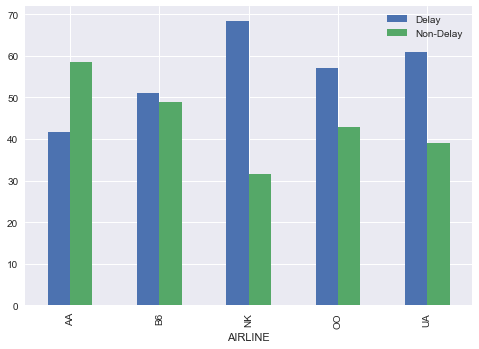

In [87]:
# proportion of delays by airline
def prop(x):
    return (sum(x == 1) / float(len(x)))*100, (sum(x != 1) / float(len(x)))*100

grouped = flights_w_weather.groupby(['AIRLINE'])['DELAY'].apply(prop)
new_cols = ['Delay','Non-Delay']
airlines = pd.DataFrame(list(zip(*grouped)), columns=grouped.index,index=new_cols).T
print(airlines)
airlines.plot(kind='bar')
plt.show()

In [89]:
# comparing proportion of delays between American and United
# determine sample sizes
american = flights_w_weather[flights_w_weather.AIRLINE=='AA']
other = flights_w_weather[flights_w_weather.AIRLINE=='UA']
american_size = len(american)
other_size = len(other)

# determine number of delays
delay_a = len(american[american.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_a = delay_a/american_size
prop_delay_o = delay_o/other_size
print(prop_delay_a)
print(prop_delay_o)


"""
Ho: prop_delay_a=prop_delay_o
Ha: prop_delay_a!=prop_delay_o
"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_a*(1-prop_delay_a) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ american_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_a-prop_delay_o-1.96*margin,prop_delay_a-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_a,delay_o]),np.array([other_size,american_size]),value=0)

0.4155640668523677
0.6088804912612187
[-0.23150543728401984, -0.15512741153368215]


(11.350564653767691, 7.3685302741049892e-30)

P-value of 0, reject null hypothesis that proportion of delays is the same between American and United. United has more. 95% confident that the difference in proportions is between -.232 and -.155. 

In [ ]:
# refer back to original flights_clean dataset - 2923 Delays had atleast one reason documented 
flights_clean
# will identify frequency of those reasons below
flights_clean.ORIGIN_AIRPORT.value_counts()

In [90]:
# how many weather delays did the dataset originally account for - multiple types can occur at once
weather = flights_clean.dropna(subset=['WEATHER_DELAY'])
x = weather.WEATHER_DELAY.count()
weather.WEATHER_DELAY.value_counts()
# found count at 0 and subtracted from total
count_1 = x - 2694

# how many late aircraft delays did the dataset originally account for - multiple types can occur at once
late = flights_clean.dropna(subset=['LATE_AIRCRAFT_DELAY'])
x = late.LATE_AIRCRAFT_DELAY.count()
late.LATE_AIRCRAFT_DELAY.value_counts()
# found count at 0 and subtracted from total
count_2 = x - 1513

# how many airline delays did the dataset originally account for - multiple types can occur at once
airline = flights_clean.dropna(subset=['AIRLINE_DELAY'])
x = airline.AIRLINE_DELAY.count()
airline.AIRLINE_DELAY.value_counts()
# found count at 0 and subtracted from total
count_3 = x - 1531

# how many security delays did the dataset originally account for - multiple types can occur at once
security = flights_clean.dropna(subset=['SECURITY_DELAY'])
x = security.SECURITY_DELAY.count()
security.SECURITY_DELAY.value_counts()
# found count at 0 and subtracted from total
count_4 = x - 2920

# how many air system delays did the dataset originally account for - multiple types can occur at once
system = flights_clean.dropna(subset=['AIR_SYSTEM_DELAY'])
x = system.AIR_SYSTEM_DELAY.count()
system.AIR_SYSTEM_DELAY.value_counts()
# found count at 0 and subtracted from total
count_5 = x - 1187

print("Weather:{}".format(count_1),
     "Aircraft:{}".format(count_2),
     "Airline:{}".format(count_3),
     "Security:{}".format(count_4),
     "Air System:{}".format(count_5))


Weather:229 Aircraft:1410 Airline:1392 Security:3 Air System:1736


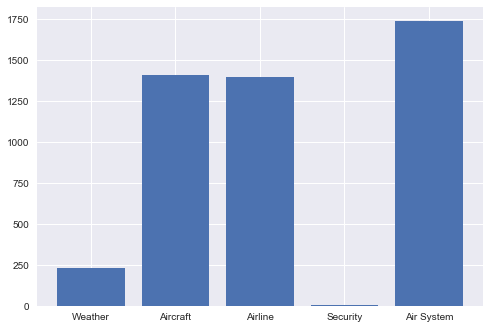

In [91]:
# plot delay reasons
x = np.arange(5)
y = [count_1, count_2, count_3, count_4, count_5]
plt.bar(x, y)
plt.xticks(x, ('Weather', 'Aircraft', 'Airline', 'Security', 'Air System'))
plt.show()

Air System was the highest, while security was the lowest. Weather was a lot lower than expected at only 229 of the
2923 delays (that had reasons documented).

In [94]:
# how many have an arrival and departure delay
d_d = flights_w_weather['DD_TAG']==1
a_d = flights_w_weather['AD_TAG']==1
both = flights_w_weather[a_d & d_d]
both['DD_TAG'].count()

3750

In [93]:
# how many only have a departure delay
d_d = flights_w_weather['DD_TAG']==1
no_ad = flights_w_weather['AD_TAG']==0
d_only = flights_w_weather[d_d & no_ad]
d_only['DD_TAG'].count()

1587

In [92]:
# how many only have an arrival delay
no_dd = flights_w_weather['DD_TAG']==0
only_ad = flights_w_weather['AD_TAG']==1
d_only = flights_w_weather[no_dd & only_ad]
d_only['AD_TAG'].count()

1130

                 Delay  Non-Delay
DAY_OF_WEEK                      
1            50.692226  49.307774
2            52.803738  47.196262
3            50.934816  49.065184
4            53.647181  46.352819
5            51.434533  48.565467
6            42.952030  57.047970
7            50.513699  49.486301


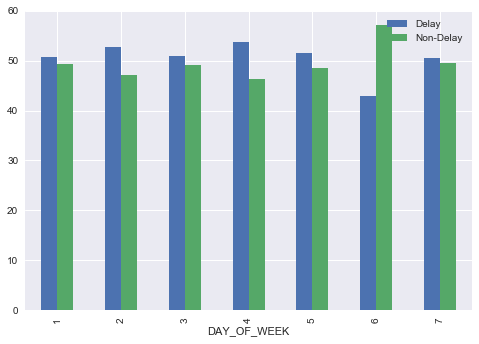

In [95]:
# how many delays are there each day of the week?
grouped = flights_w_weather.groupby(['DAY_OF_WEEK'])['DELAY'].apply(prop)
new_cols = ['Delay','Non-Delay']
days = pd.DataFrame(list(zip(*grouped)), columns=grouped.index,index=new_cols).T
print(days)
days.plot(kind='bar')
plt.show()

Friday has the lowest rate of delays at 42.95% while Wednesday has the highest at 53.65%. 

In [242]:
# how does friday compare to saturday 
friday = flights_w_weather[flights_w_weather.DAY_OF_WEEK==6]
other = flights_w_weather[flights_w_weather.DAY_OF_WEEK==7]
friday_size = len(friday)
other_size = len(other)

# determine number of delays
delay_f = len(friday[friday.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_f = delay_f/friday_size
prop_delay_o = delay_o/other_size
print(prop_delay_f)
print(prop_delay_o)

"""
Ho: prop_delay_f=prop_delay_o
Ha: prop_delay_f!=prop_delay_o
"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_f*(1-prop_delay_f) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ friday_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_f-prop_delay_o-1.96*margin,prop_delay_f-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_f,delay_o]),np.array([other_size,friday_size]),value=0)

0.42952029520295204
0.5051369863013698
[-0.14480188776206657, -0.006431494434769008]


(-17.770539827059192, 1.1953491395162437e-70)

P-value of 0, reject null hypothesis that proportion of delays is the same between Friday and Saturday. Friday most likely has less. 95% confident that the difference in proportions is between -.15 and -.006. 

In [96]:
# identify each season
flights_w_weather['SEASON'] = np.where((flights_w_weather['DATE'] >= '2015-01-01') & 
                                      (flights_w_weather['DATE'] < '2015-03-21'), 'Winter', 
                np.where((flights_w_weather['DATE'] >= '2015-03-21') & 
                         (flights_w_weather['DATE'] < '2015-06-21'), 'Spring', 
                np.where((flights_w_weather['DATE'] >= '2015-06-21') & 
                         (flights_w_weather['DATE'] < '2015-09-22'), 'Summer',
                np.where((flights_w_weather['DATE'] >= '2015-09-22') & 
                         (flights_w_weather['DATE'] < '2015-12-21'), 'Fall', 'Winter'))))    
                         

In [97]:
# frequency of flights each season
flights_w_weather.SEASON.value_counts()

Summer    4162
Spring    3703
Winter    2574
Fall      2301
Name: SEASON, dtype: int64

            Delay  Non-Delay
SEASON                      
Fall    35.462842  64.537158
Spring  50.850662  49.149338
Summer  52.114368  47.885632
Winter  62.121212  37.878788


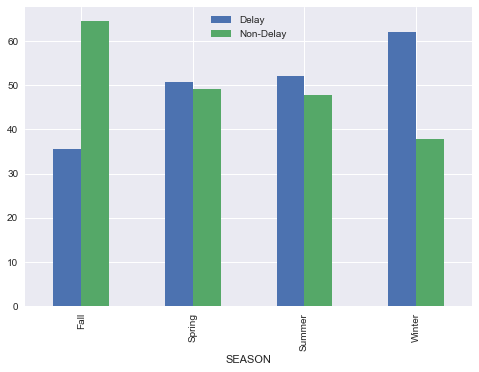

In [98]:
# proportion of delays by season 
def prop(x):
    return (sum(x == 1) / float(len(x)))*100, (sum(x != 1) / float(len(x)))*100

grouped = flights_w_weather.groupby(['SEASON'])['DELAY'].apply(prop)
new_cols = ['Delay','Non-Delay']
seasons = pd.DataFrame(list(zip(*grouped)), columns=grouped.index,index=new_cols).T
print(seasons)
seasons.plot(kind='bar')
plt.show()

In [125]:
# does season have a statistically significant effect on the amount of delays?

# summer vs. winter
winter = flights_w_weather[flights_w_weather.SEASON=='Winter']
other = flights_w_weather[flights_w_weather.SEASON=='Summer']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

"""
Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o
"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

0.6212121212121212
0.5211436809226333
[0.05247466474017054, 0.1476622158388053]


(-36.827910671099801, 6.6027558761941656e-297)

P-value of 0, reject null hypothesis that proportion of delays is the same between summer and winter. Winter has more. 95% confident that the difference in proportions is between .052 and .148. 

In [102]:
# summer vs. winter
winter = flights_w_weather[flights_w_weather.SEASON=='Winter']
other = flights_w_weather[flights_w_weather.SEASON=='Fall']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

"""Hypothesis:

Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

0.6212121212121212
0.3546284224250326
[0.213466975074191, 0.3197004224999862]


(26.345075048700568, 5.8446179195098188e-153)

P-value of 0, reject null hypothesis that proportion of delays is the same between winter and fall. Winter has more. 95% confident that the difference in proportions is between .21 and .31. 

In [103]:
# summer vs. winter
winter = flights_w_weather[flights_w_weather.SEASON=='Winter']
other = flights_w_weather[flights_w_weather.SEASON=='Spring']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

"""Hypothesis:

Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

0.6212121212121212
0.5085066162570888
[0.06401527223230782, 0.16139573767775697]


(-23.501099591131105, 3.9745013914199538e-122)

P-value of 0, reject null hypothesis that proportion of delays is the same between winter and spring. Winter has more delays. 95% confident that difference in proportions is between .06 and .16.

Safe to say from this analysis that winter does have the highest proportion of delays. 

In [124]:
# does airport have a significant effect on delays?

# determine sample sizes again
ord_orig = flights_w_weather[flights_w_weather.ORIGIN_AIRPORT=='ORD']
bos_orig = flights_w_weather[flights_w_weather.ORIGIN_AIRPORT=='BOS']
ord_size = len(ord_orig)
bos_size = len(bos_orig)
print(ord_size)
print(bos_size)

# determine number of delays again 
delay_o = len(ord_orig[ord_orig.DELAY == 1])
delay_b = len(bos_orig[bos_orig.DELAY == 1])
print(delay_o)
print(delay_b)

# determine proportion of delays
prop_delay_o = delay_o/ord_size
prop_delay_b = delay_b/bos_size
print(prop_delay_o)
print(prop_delay_b)

"""
Ho: prop_delay_o=prop_delay_b
Ha: prop_delay_o!=prop_delay_b
"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_o*(1-prop_delay_o) / bos_size) + 
                          (prop_delay_b*(1-prop_delay_b)/ ord_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_o-prop_delay_b-1.96*margin,prop_delay_o-prop_delay_b+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_o,delay_b]),np.array([bos_size,ord_size]),value=0)

6374
6366
3288
3179
0.5158456228427989
0.4993716619541313
[-0.017552611449394073, 0.05050053322672926]


(2.0035869948090332, 0.045114320125785611)

p-value low enough to reject null hypothesis, there is a slight difference in proportion of delays. Much more likely that Ohare will have more as confidence interval is -.01 to .05.  

# Machine Learning

## Data Prep

In [107]:
# normalize continuous variables used in Logistic Regression
from sklearn import preprocessing

flights_w_weather['SNOW'].fillna((flights_w_weather['SNOW'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
snow = flights_w_weather[['SNOW']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
snow_scaled = min_max_scaler.fit_transform(snow)

# Run the normalizer on the dataframe
snow_normalized = pd.DataFrame(snow_scaled)
# change values 
flights_w_weather['SNOW']= snow_normalized
flights_w_weather['SNOW'].fillna((flights_w_weather['SNOW'].mean()), inplace=True)

In [108]:
# normalize prcp
from sklearn import preprocessing

flights_w_weather['PRCP'].fillna((flights_w_weather['PRCP'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
prcp = flights_w_weather[['PRCP']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
prcp_scaled = min_max_scaler.fit_transform(prcp)

# Run the normalizer on the dataframe
prcp_normalized = pd.DataFrame(prcp_scaled)
# change values 
flights_w_weather['PRCP']= prcp_normalized
flights_w_weather['PRCP'].fillna((flights_w_weather['PRCP'].mean()), inplace=True)

In [109]:
# normalize awnd
from sklearn import preprocessing

flights_w_weather['AWND'].fillna((flights_w_weather['AWND'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
wind = flights_w_weather[['AWND']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
wind_scaled = min_max_scaler.fit_transform(wind)

# Run the normalizer on the dataframe
wind_normalized = pd.DataFrame(wind_scaled)
# change values 
flights_w_weather['AWND']= wind_normalized
flights_w_weather['AWND'].fillna((flights_w_weather['AWND'].mean()), inplace=True)

In [110]:
# redefined as dflogit before dummy variables
dflogit_1=flights_w_weather

/Users/joshfriedman/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
# created dumby variables
for elem in dflogit_1['DAY_OF_WEEK']:
    dflogit_1[str(elem)] = dflogit_1['DAY_OF_WEEK'] == elem
    
for elem in dflogit_1['AIRLINE']:
    dflogit_1[str(elem)] = dflogit_1['AIRLINE'] == elem
    
for elem in dflogit_1['SEASON']:
    dflogit_1[str(elem)] = dflogit_1['SEASON'] == elem
    
for elem in dflogit_1['ORIGIN_AIRPORT']:
    dflogit_1[str(elem)] = dflogit_1['ORIGIN_AIRPORT'] == elem

for elem in dflogit_1['DESTINATION_AIRPORT']:
    dflogit_1[str(elem)] = dflogit_1['DESTINATION_AIRPORT'] == elem

## Logistic Regression

In [197]:
from patsy import dmatrices
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split,  cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(dflogit_1[['4', '5', '6', '7',
       '1', '2', 'B6', 'AA', 'UA', 'OO', 'Winter', 'Spring',
       'Summer', 'ORD', 'AWND', 'PRCP', 'SNOW']].values, (dflogit_1.DELAY == 1).values,random_state=5)

In [215]:
param_grid = {"C":[0.001, 0.1, 1, 10, 100]}
clf=GridSearchCV(LogisticRegression(), param_grid, cv = 5)

In [219]:
clf.fit(Xlr, ylr)
# accuracy score 
y_test_pred = clf.predict(X_test)
print('accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred)))  
# confusion matrix 
lr_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('confusion matrix:\n {}\n'.format(lr_conf_matrix))

accuracy score:0.61
confusion matrix:
 [[ 938  603]
 [ 634 1010]]



True Positive: 1010 were delays and predicted correctly
True Negative: 938 were not delays and predicted correctly 
False Positive: 634 were delays and predicted incorrectly
False Negative: 603 were not delays and predicted incorrectly

In [220]:
clf.best_estimator_.coef_

array([[ 0.10106095, -0.03579078, -0.31209424,  0.03625087, -0.02389061,
         0.05063511, -0.74585284, -1.14518672, -0.2657793 , -0.62786083,
         1.13601329,  0.6986425 ,  0.770679  , -0.09006349,  0.60895963,
         1.49682233,  4.35446298]])

Snow is the most influential feature. PRCP is 2nd most influential. 

Weekday coefficients: Wednesday, Thursday, Saturday, Monday all contribute to a higher likelihood of delay than Tuesday. Friday and Saturday all contribute to a lower likelihood of delay.

Airline Coefficients: Spirit Airlines appears to have the lowest contribution to a delay. B6, AA, UA, and OO are all negative. 

Season Coefficients: Fall appears to have the lowest contribution to a delay. Winter, Spring, and Summer are all positive. 

Airport Coefficients: Boston appears to have a higher contribution to delay than Chicago. 

0.649228074164


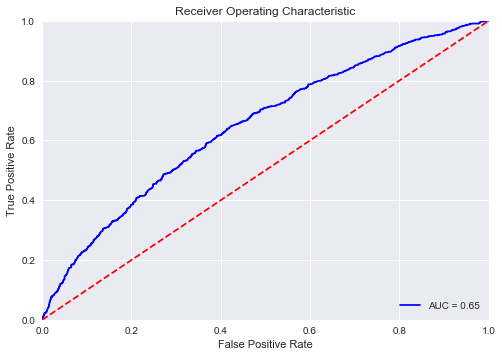

In [221]:
# roc 
probs = clf.predict_proba(Xtestlr)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytestlr, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [222]:
X_train, X_test, y_train, y_test = train_test_split(dflogit_1[['4', '5', '6', '7',
       '1', '2', 'B6', 'AA', 'UA', 'OO', 'Winter', 'Spring',
       'Summer', 'ORD', 'AWND', 'PRCP', 'SNOW']].values, (dflogit_1.DELAY == 1).values, random_state = 5)

In [223]:
forest_params = {'n_estimators': [1,10,40,70,100],
                 'min_samples_split': [8, 16], 
                 'min_samples_leaf': [4, 8]}
rfc = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)

In [234]:
rfc.fit(X_train, y_train)
# accuracy score
y_test_pred = rfc.predict(X_test)
print('accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred)))  

# confusion matrix 
lr_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('confusion matrix:\n {}\n'.format(lr_conf_matrix))

accuracy score:0.64
confusion matrix:
 [[ 942  599]
 [ 559 1085]]



True Positive: 1085 were delays and predicted correctly
True Negative: 942 were not delays and predicted correctly 
False Positive: 599 were not delays and predicted incorrectly
False Negative: 559 were delays and predicted incorrectly

In [239]:
rfc.best_estimator_.feature_importances_

array([ 0.02,  0.02,  0.02,  0.02,  0.02,  0.02,  0.02,  0.09,  0.06,
        0.01,  0.05,  0.04,  0.04,  0.04,  0.32,  0.14,  0.06])

Most important features are Wind and Precipitation.

0.682395898957


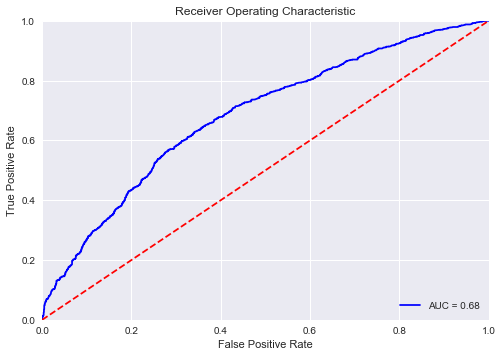

In [181]:
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K-NN

In [183]:
X_train, X_test,y_train,y_test = train_test_split(dflogit_1[['4', '5', '6', '7',
       '1', '2', 'B6', 'AA', 'UA', 'OO', 'Winter', 'Spring',
       'Summer', 'ORD', 'AWND', 'PRCP', 'SNOW']].values, (dflogit_1.DELAY == 1).values, random_state = 5)

In [236]:
param_grid = {'n_neighbors': [20,30,40,50,60,70,80,90,100]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [237]:
knn.fit(X_train,y_train)
# accuracy score
y_test_pred = grid.predict(X_test)
print('accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred))) 

# confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('confusion matrix:\n {}\n'.format(knn_conf_matrix))

accuracy score:0.61
confusion matrix:
 [[979 562]
 [694 950]]



True Positive: 950 were delays and predicted correctly
True Negative: 979 were not delays and predicted correctly 
False Positive: 562 were not delays and predicted incorrectly
False Negative:  694 were delays and predicted incorrectly

0.64180012347


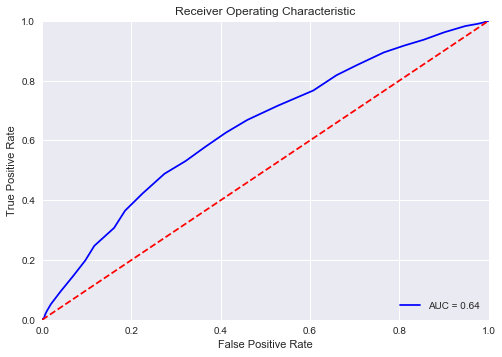

In [226]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random forest performs best with an AUC score of .68. Logistic regression and KNN model provided an AUC score of .65 and .64, respectively. 